# Case Study Project - Office Supplies
## by Aldair Mendoza


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Wrangling

In [2]:
office_supplies = pd.read_csv('office_supplies.csv')
office_supplies.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


## Cleaning

In [3]:
office_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [4]:
office_supplies.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [5]:
office_supplies['Ship Mode'].value_counts(normalize=True)*100

Standard Class    59.711798
Second Class      19.463625
First Class       15.390774
Same Day           5.433804
Name: Ship Mode, dtype: float64

In [6]:
office_supplies['Region'].value_counts(normalize=True)*100

West       32.052437
East       28.499950
Central    23.236265
South      16.211348
Name: Region, dtype: float64

In [7]:
office_supplies['Category'].value_counts(normalize=True)*100

Office Supplies    60.302212
Furniture          21.224857
Technology         18.472931
Name: Category, dtype: float64

In [8]:
office_supplies['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### We can see unique value in the heatmaps because of this we can remove outliers

In [9]:
q1 = office_supplies['Sales'].quantile(0.25)
q3 = office_supplies['Sales'].quantile(0.75)
iqr = q3 - q1

In [10]:
q1, q3, iqr

(17.28, 209.94, 192.66)

In [11]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-271.71000000000004, 498.93)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

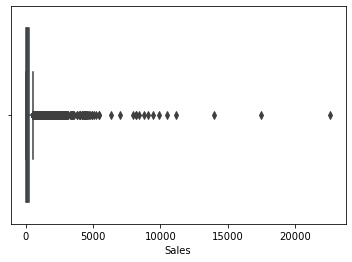

In [12]:
sns.boxplot(office_supplies['Sales'])

In [13]:
office_supplies.loc[(office_supplies['Sales'] > upper_limit) | (office_supplies['Sales'] < lower_limit)]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN
8,CA-2015-110863,2015-11-17,Standard Class,Central,FUR-CH-10002073,Furniture,Chairs,Hon Olson Stacker Chairs,1323.900,5,0.0,NaN
11,CA-2017-120168,2017-05-25,Same Day,East,OFF-BI-10004519,Office Supplies,Binders,GBC DocuBind P100 Manual Binding Machine,663.920,5,0.2,NaN
22,CA-2014-129189,2014-07-21,Standard Class,Central,FUR-CH-10004997,Furniture,Chairs,Hon Every-Day Series Multi-Task Chairs,657.930,5,0.3,NaN
27,CA-2015-132465,2015-09-11,Second Class,East,OFF-ST-10001932,Office Supplies,Storage,Fellowes Staxonsteel Drawer Files,772.680,4,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9931,CA-2017-166093,2017-08-17,Standard Class,West,OFF-ST-10001496,Office Supplies,Storage,Standard Rollaway File with Lock,540.570,3,0.0,140.5482
9945,CA-2015-145814,2015-11-19,Standard Class,East,TEC-PH-10002200,Technology,Phones,Aastra 6757i CT Wireless VoIP phone,861.760,4,0.0,249.9104
9963,US-2015-126753,2015-08-16,Standard Class,East,TEC-PH-10003580,Technology,Phones,Cisco IP Phone 7961G-GE VoIP phone,519.792,4,0.4,-112.6216
9970,CA-2014-166051,2014-05-31,Standard Class,South,TEC-PH-10002680,Technology,Phones,Samsung Galaxy Note 3,659.970,3,0.0,197.9910


In [14]:
new_office_supplies = office_supplies.loc[(office_supplies['Sales'] > upper_limit) | (office_supplies['Sales'] < lower_limit)]
print('Before removing outliers: ', len(office_supplies))
print('After removing outliers: ', len(new_office_supplies))
print('Outliers: ', len(office_supplies) - len(new_office_supplies))

Before removing outliers:  9993
After removing outliers:  1167
Outliers:  8826


In [15]:
office_supplies.shape, new_office_supplies.shape

((9993, 12), (1167, 12))

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

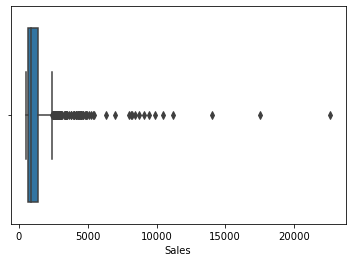

In [16]:
sns.boxplot(new_office_supplies['Sales'])

## General Overview of Sales

In [17]:
new_office_supplies = new_office_supplies.copy()

In [18]:
new_office_supplies['Order Date'] = pd.to_datetime(new_office_supplies['Order Date'])

In [50]:
new_office_supplies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 6 to 9990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1167 non-null   object        
 1   Order Date    1167 non-null   datetime64[ns]
 2   Ship Mode     1167 non-null   object        
 3   Region        1167 non-null   object        
 4   Product ID    1167 non-null   object        
 5   Category      1167 non-null   object        
 6   Sub-Category  1167 non-null   object        
 7   Product Name  1167 non-null   object        
 8   Sales         1167 non-null   float64       
 9   Quantity      1167 non-null   int64         
 10  Discount      1167 non-null   float64       
 11  Profit        955 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 118.5+ KB


In [20]:
monthly_sales = new_office_supplies.groupby(['Order Date'], as_index=False)['Sales'].sum()

In [21]:
monthly_sales.set_index('Order Date', inplace=True)

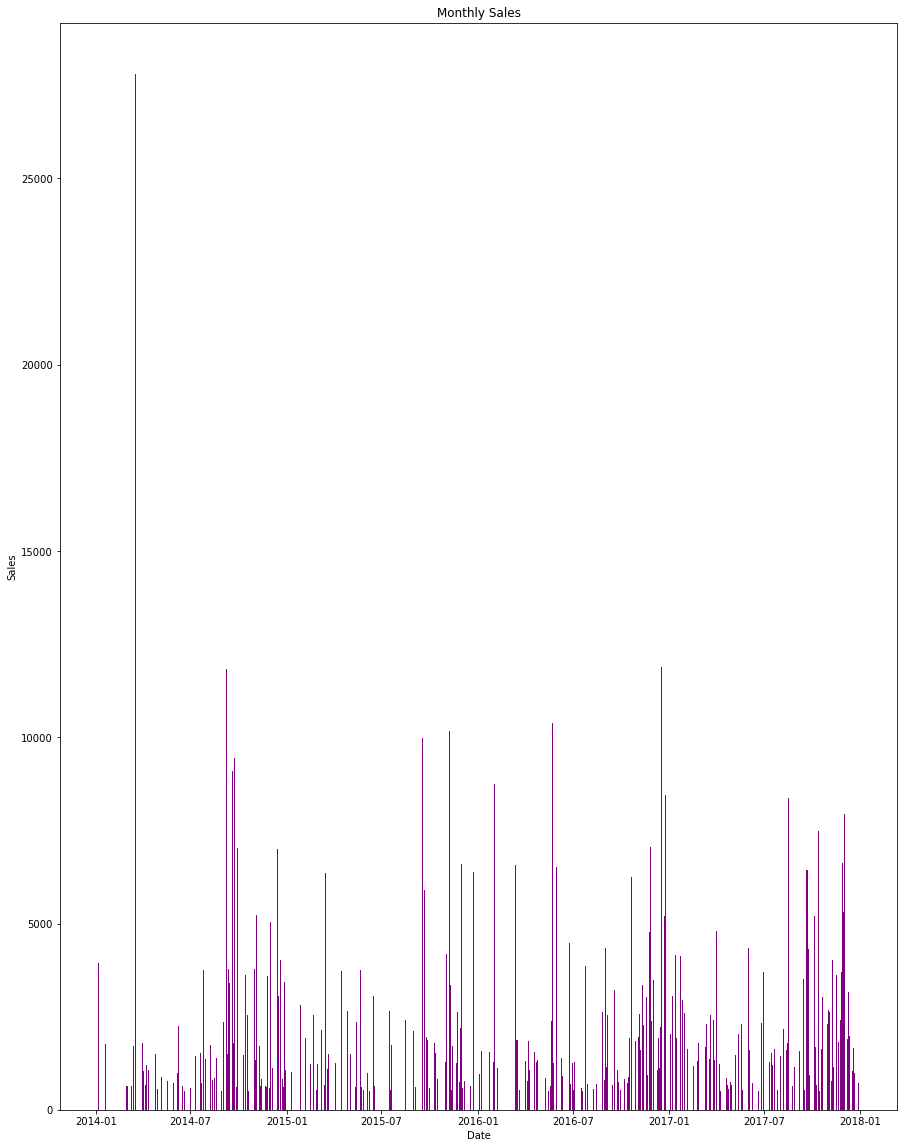

In [22]:
fig, ax = plt.subplots(figsize=(15, 20))
ax.bar(monthly_sales.index.values,
       monthly_sales['Sales'],
       color='purple')
ax.set(xlabel="Date",
       ylabel="Sales",
       title="Monthly Sales")
plt.show()

## The popularity of products in each region. 

In [23]:
region_group = new_office_supplies.groupby(['Region', 'Category', 'Sub-Category'], as_index = False)['Sales'].mean()
region_group.head()

,Region,Category,Sub-Category,Sales
0,Central,Furniture,Bookcases,997.991627
1,Central,Furniture,Chairs,1056.220661
2,Central,Furniture,Furnishings,802.805000
3,Central,Furniture,Tables,891.828394
4,Central,Office Supplies,Appliances,1062.068833


In [24]:
region_group["Region"] = region_group["Region"].astype('category').cat.reorder_categories(new_categories=["West","East","Central","South"], ordered=True)

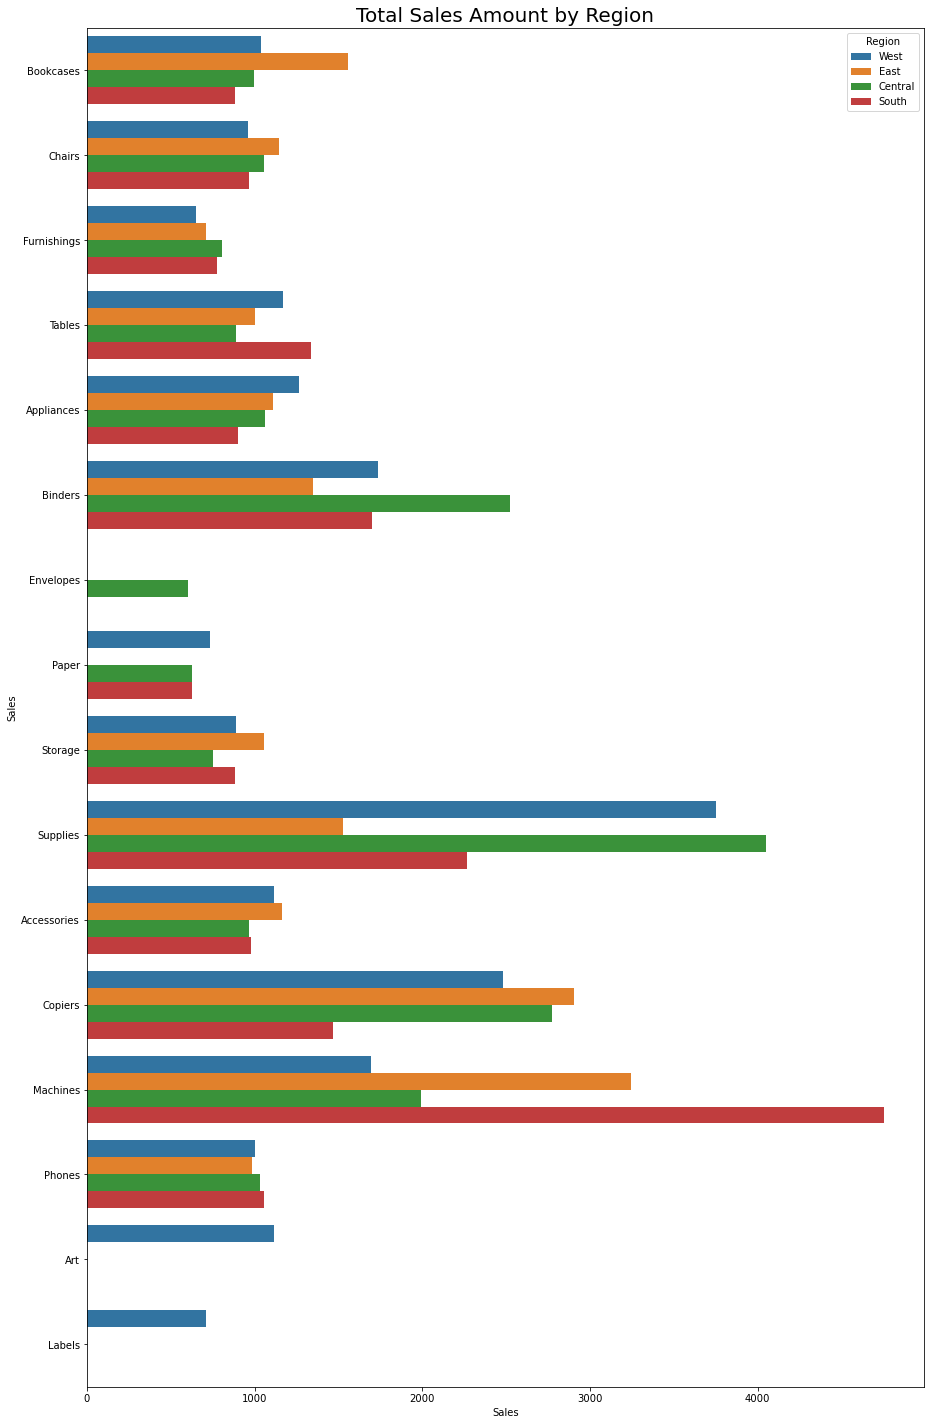

In [25]:
fig, ax = plt.subplots(figsize=(15, 25))
ax = sns.barplot(x="Sales", y="Sub-Category", hue='Region', ci=False, data=region_group)
plt.title("Total Sales Amount by Region", size=20)
plt.ylabel("Sales")
plt.show()

## Category Sales per Region

In [26]:
category_sales = new_office_supplies.groupby(['Region','Category', 'Sub-Category'], as_index=False).sum()
category_sales.sample(10)

,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
43,West,Office Supplies,Appliances,16417.658,78,0.20,4147.0875
22,East,Technology,Accessories,22135.198,120,1.20,5383.7568
39,West,Furniture,Bookcases,22882.016,133,3.25,762.0144
46,West,Office Supplies,Labels,1415.664,16,0.20,613.4544
47,West,Office Supplies,Paper,733.950,7,0.00,352.2960
36,South,Technology,Copiers,8819.772,24,0.40,3256.9149
8,Central,Office Supplies,Storage,23383.360,147,2.80,1187.3580
25,East,Technology,Phones,66830.442,329,8.80,7364.8914
19,East,Office Supplies,Binders,35005.340,106,6.70,4506.9170
45,West,Office Supplies,Binders,34752.917,100,5.00,7802.0527


In [27]:
category_sales["Region"] = category_sales["Region"].astype('category').cat.reorder_categories(new_categories=["West","East","Central","South"], ordered=True)

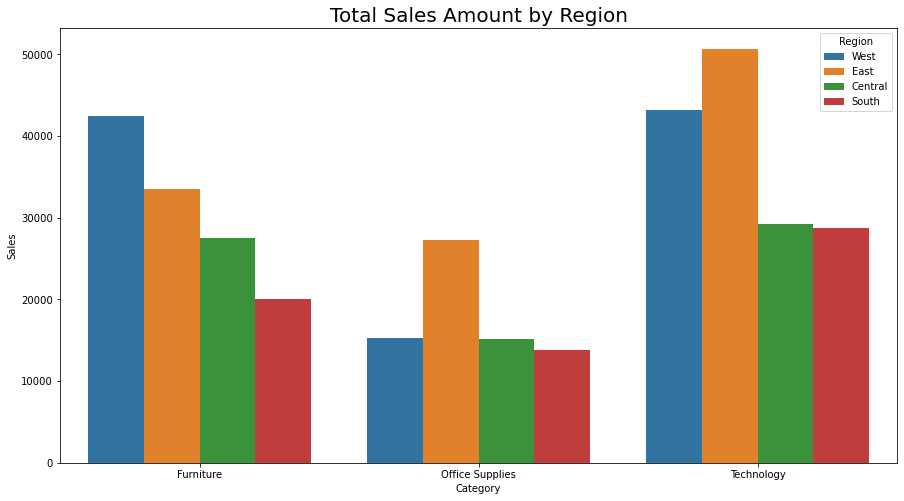

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x="Category", y="Sales", hue='Region', ci=False, data=category_sales)
plt.title("Total Sales Amount by Region", size=20)
plt.ylabel("Sales")
plt.show()

## Are there products that do not sell in some locations? Top 50 products less sold per Region

In [29]:
product_sales = new_office_supplies.groupby(['Order Date','Product Name','Region','Category','Sub-Category'], as_index=False).sum()

In [30]:
central_sales = product_sales[product_sales['Region']=='Central']
east_sales = product_sales[product_sales['Region']=='East']
south_sales = product_sales[product_sales['Region']=='South']
west_sales = product_sales[product_sales['Region']=='West']

In [31]:
central_smallest = central_sales.groupby('Product Name', as_index=False).sum()

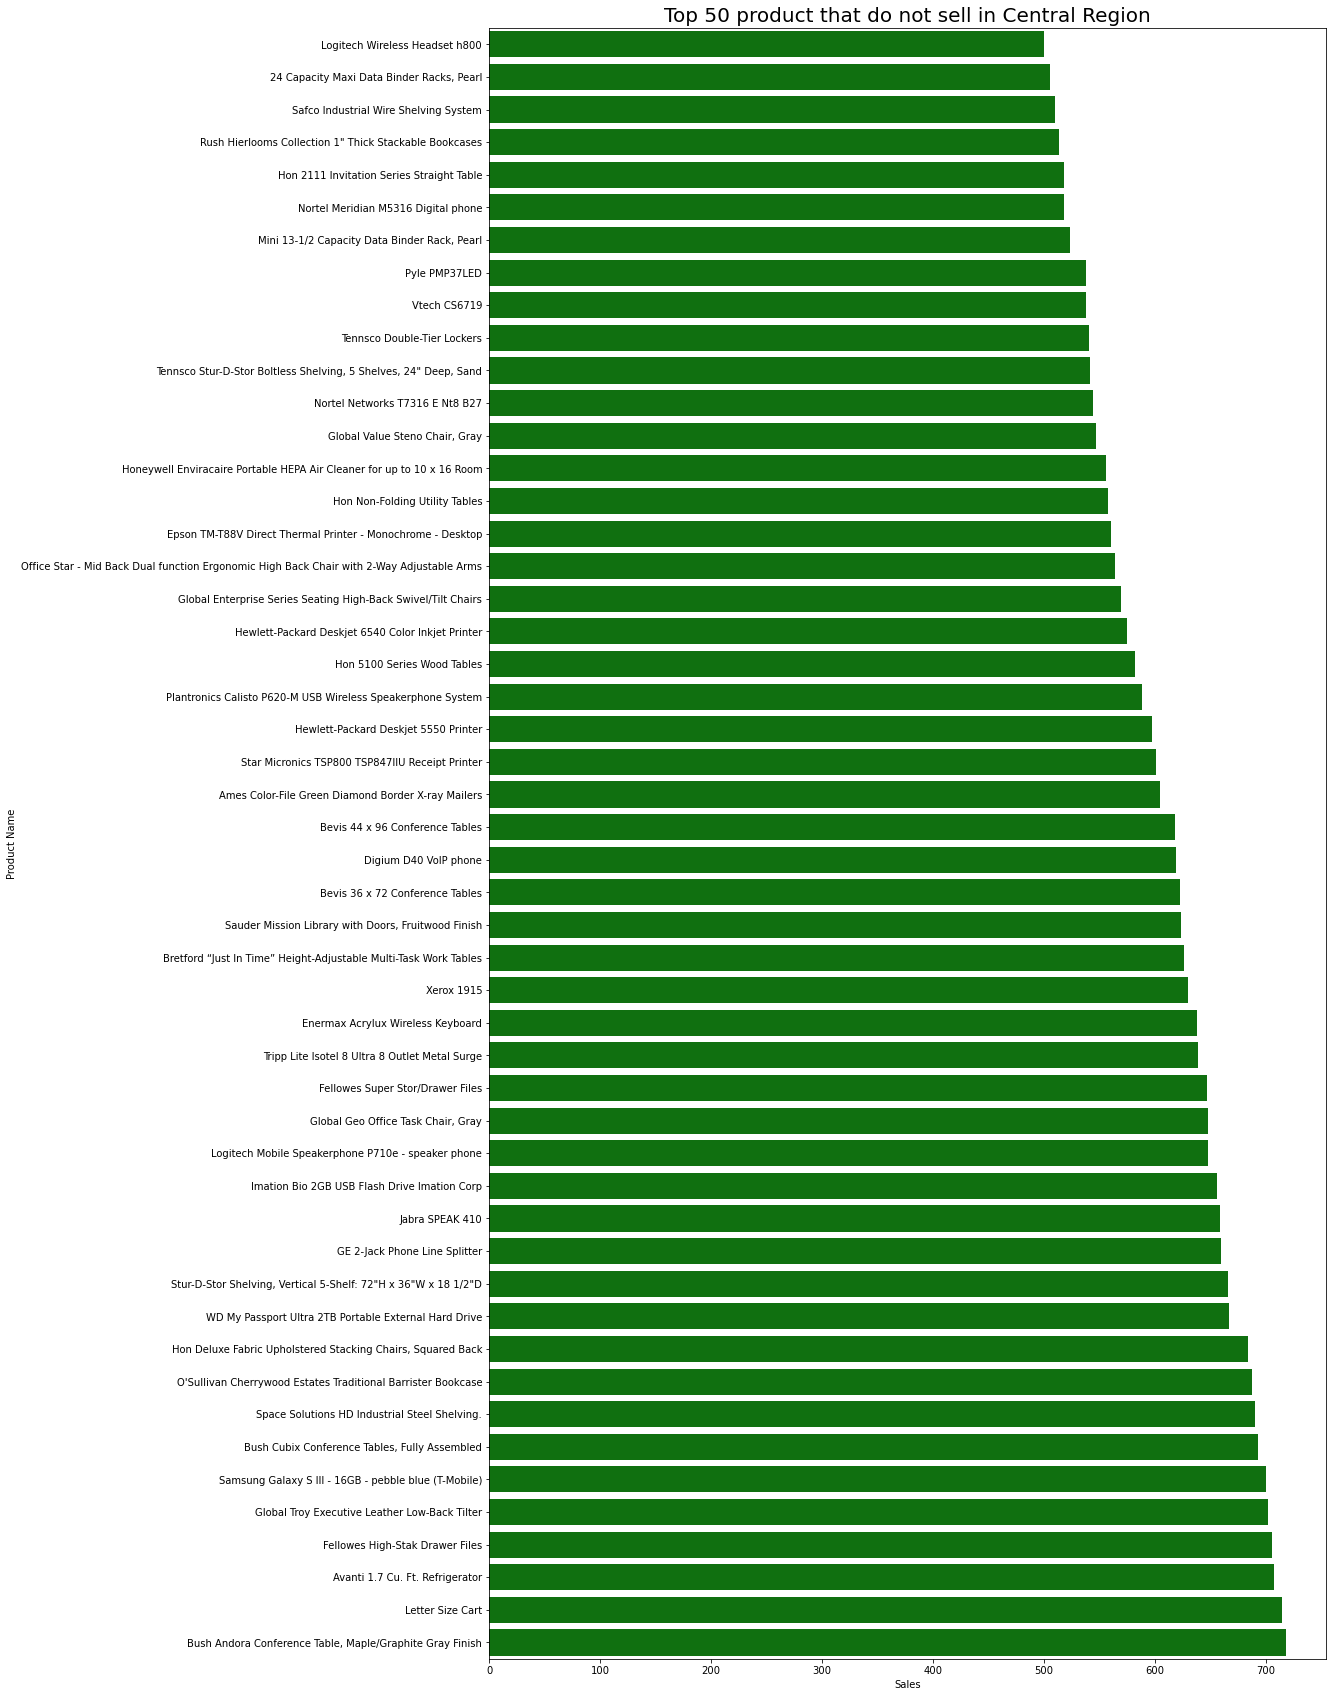

In [32]:
fig, ax = plt.subplots(figsize=(15, 30))
ax = sns.barplot(x="Sales", y="Product Name", ci=False, data=central_smallest.nsmallest(50,'Sales'), color='Green')
plt.title("Top 50 product that do not sell in Central Region", size=20)
plt.xlabel("Sales")
plt.show()

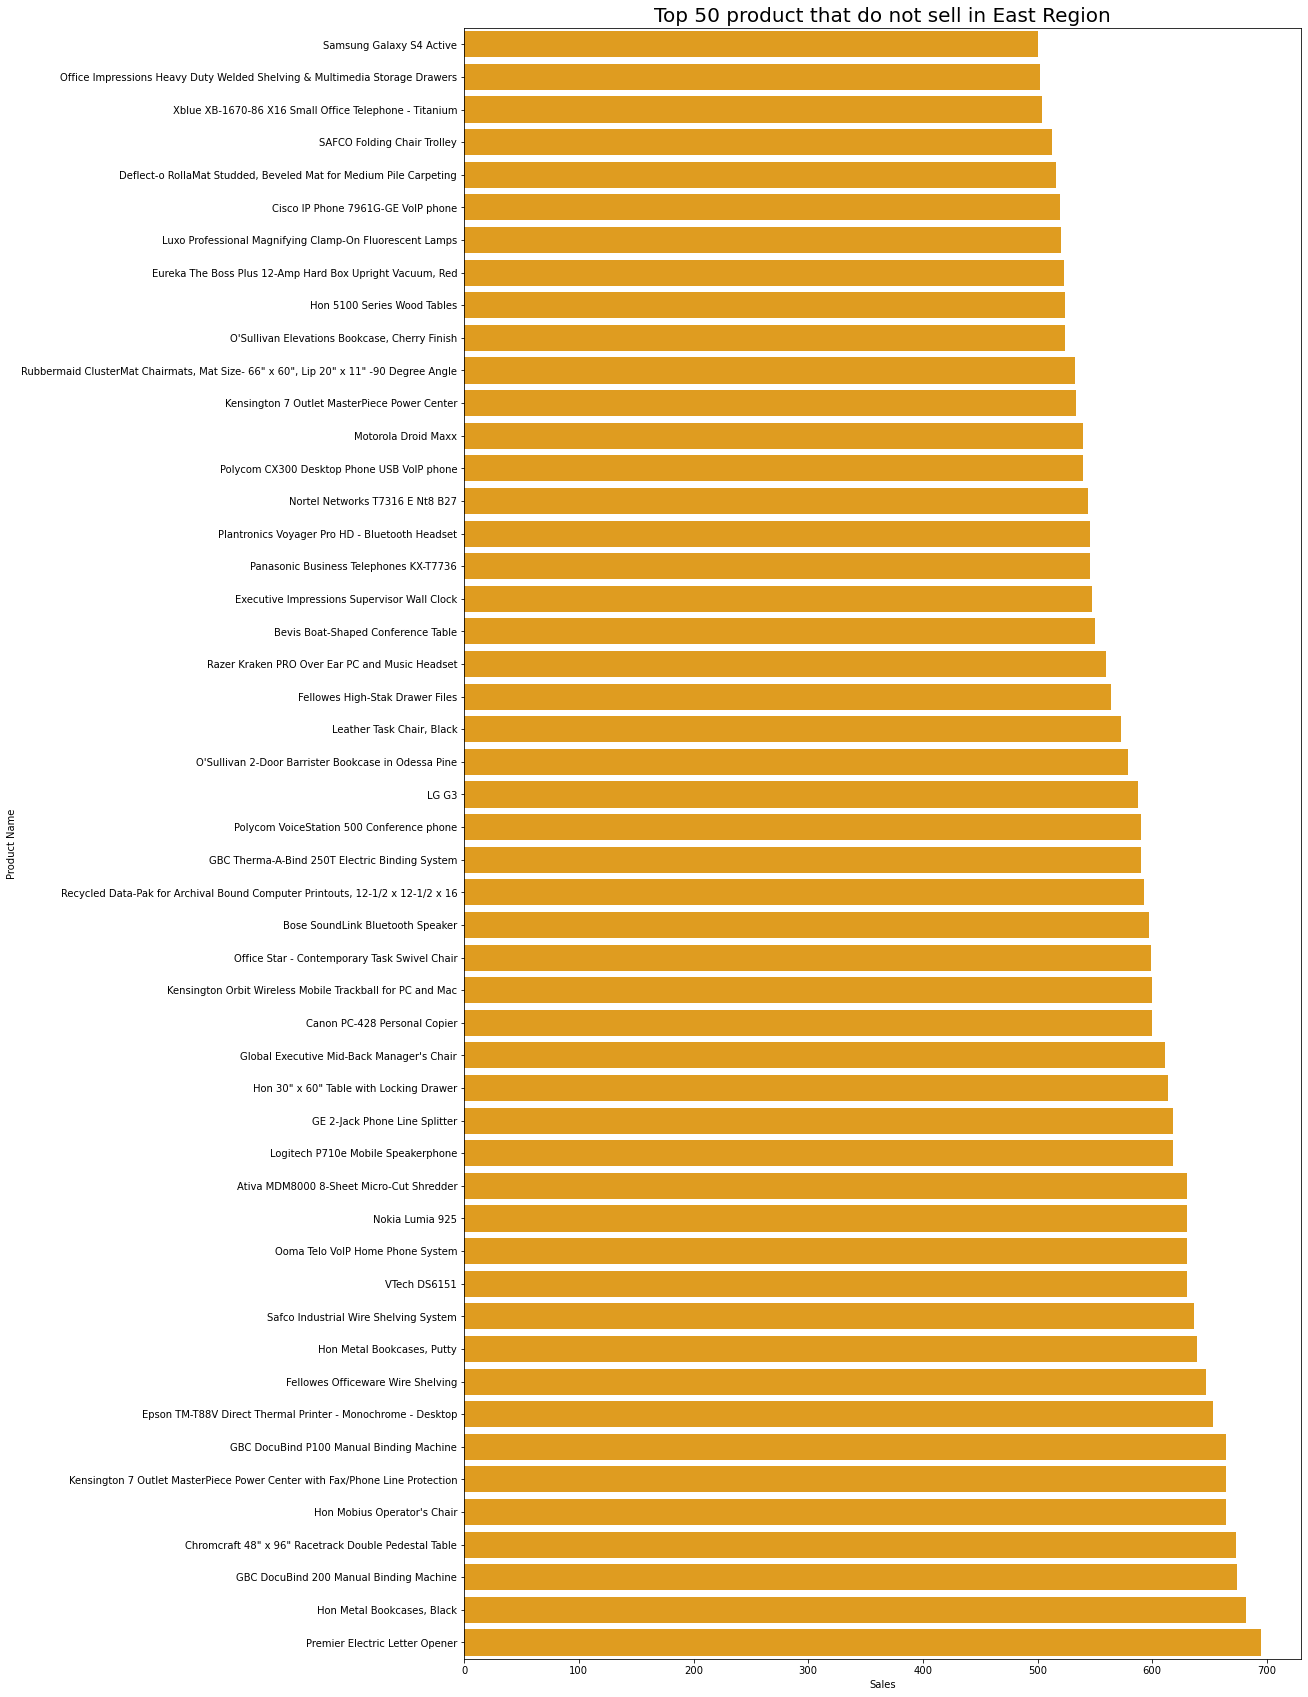

In [33]:
east_smallest = east_sales.groupby('Product Name', as_index=False).sum()
fig, ax = plt.subplots(figsize=(15, 30))
ax = sns.barplot(x="Sales", y="Product Name", ci=False, data=east_smallest.nsmallest(50,'Sales'), color='Orange')
plt.title("Top 50 product that do not sell in East Region", size=20)
plt.xlabel("Sales")
plt.show()

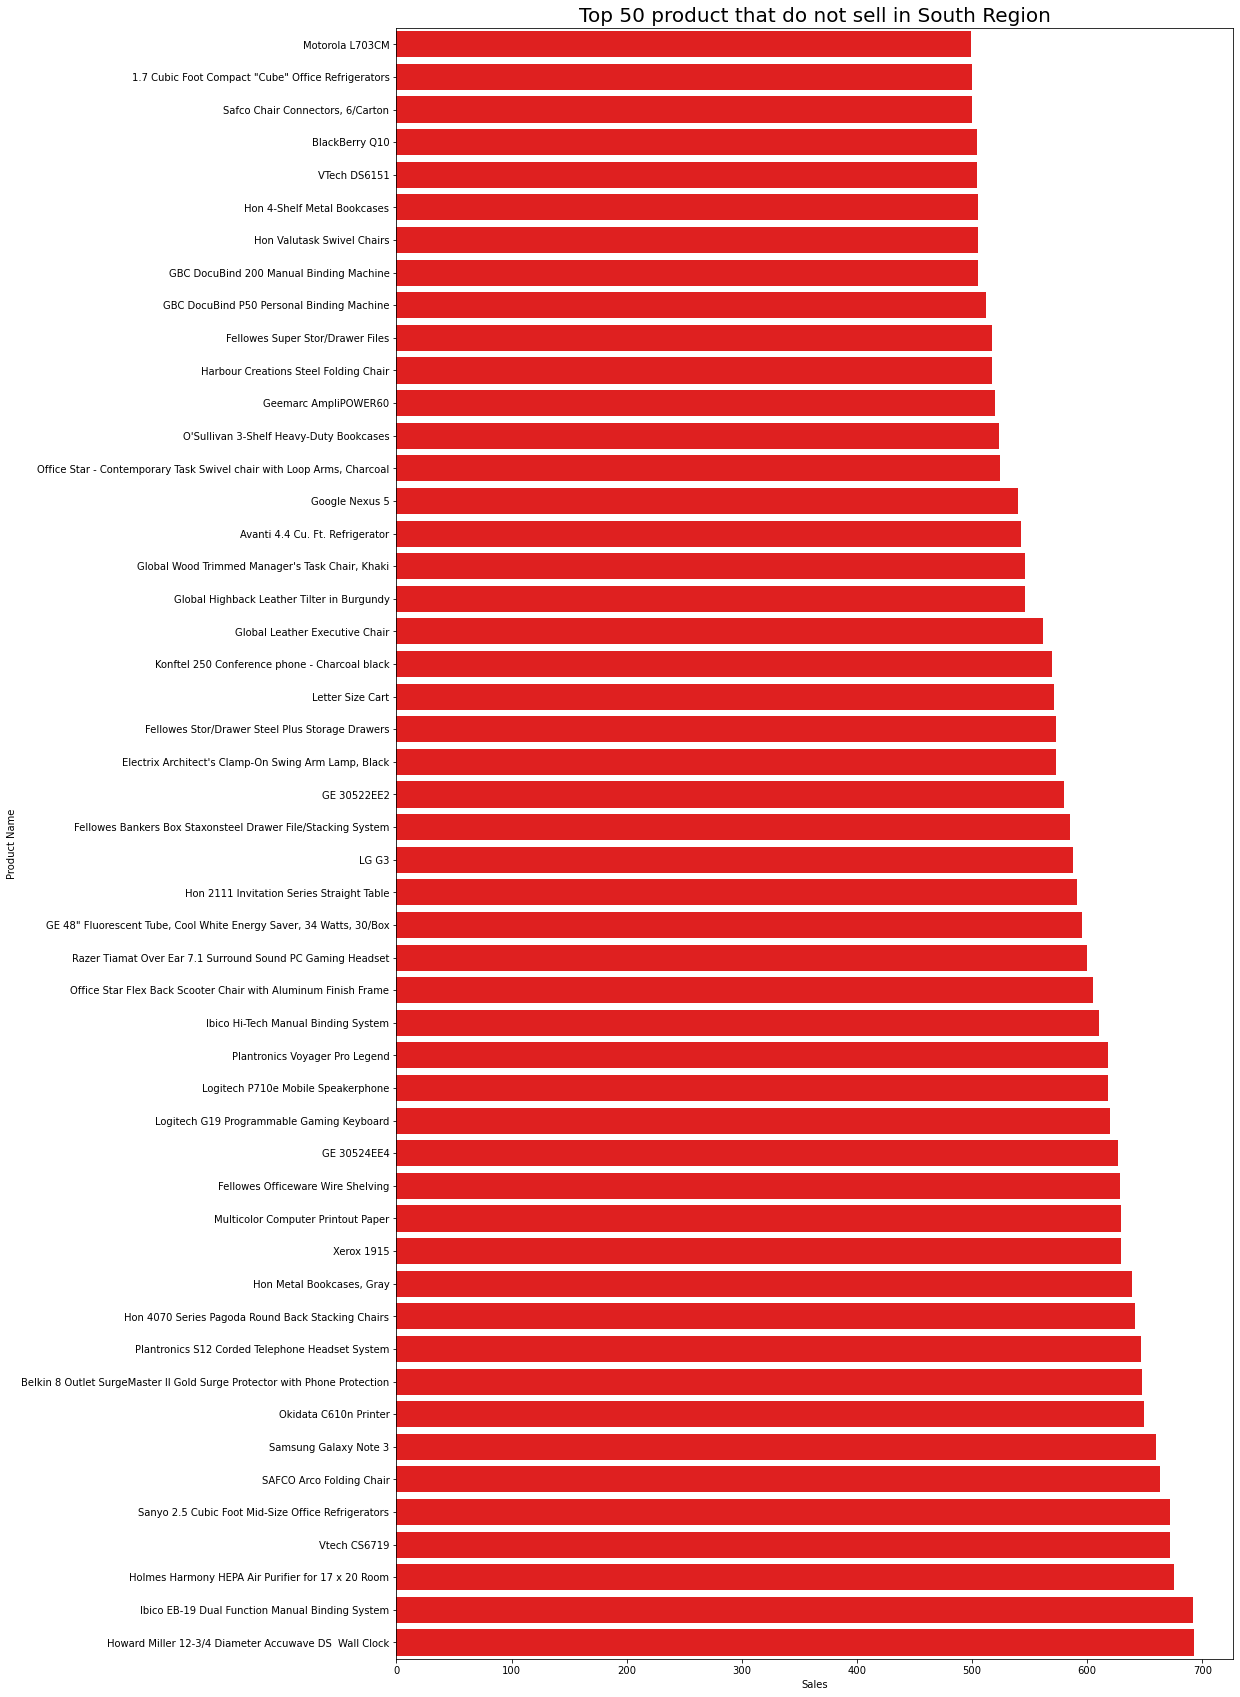

In [34]:
south_smallest = south_sales.groupby('Product Name', as_index=False).sum()
fig, ax = plt.subplots(figsize=(15, 30))
ax = sns.barplot(x="Sales", y="Product Name", ci=False, data=south_smallest.nsmallest(50,'Sales'), color='Red')
plt.title("Top 50 product that do not sell in South Region", size=20)
plt.xlabel("Sales")
plt.show()

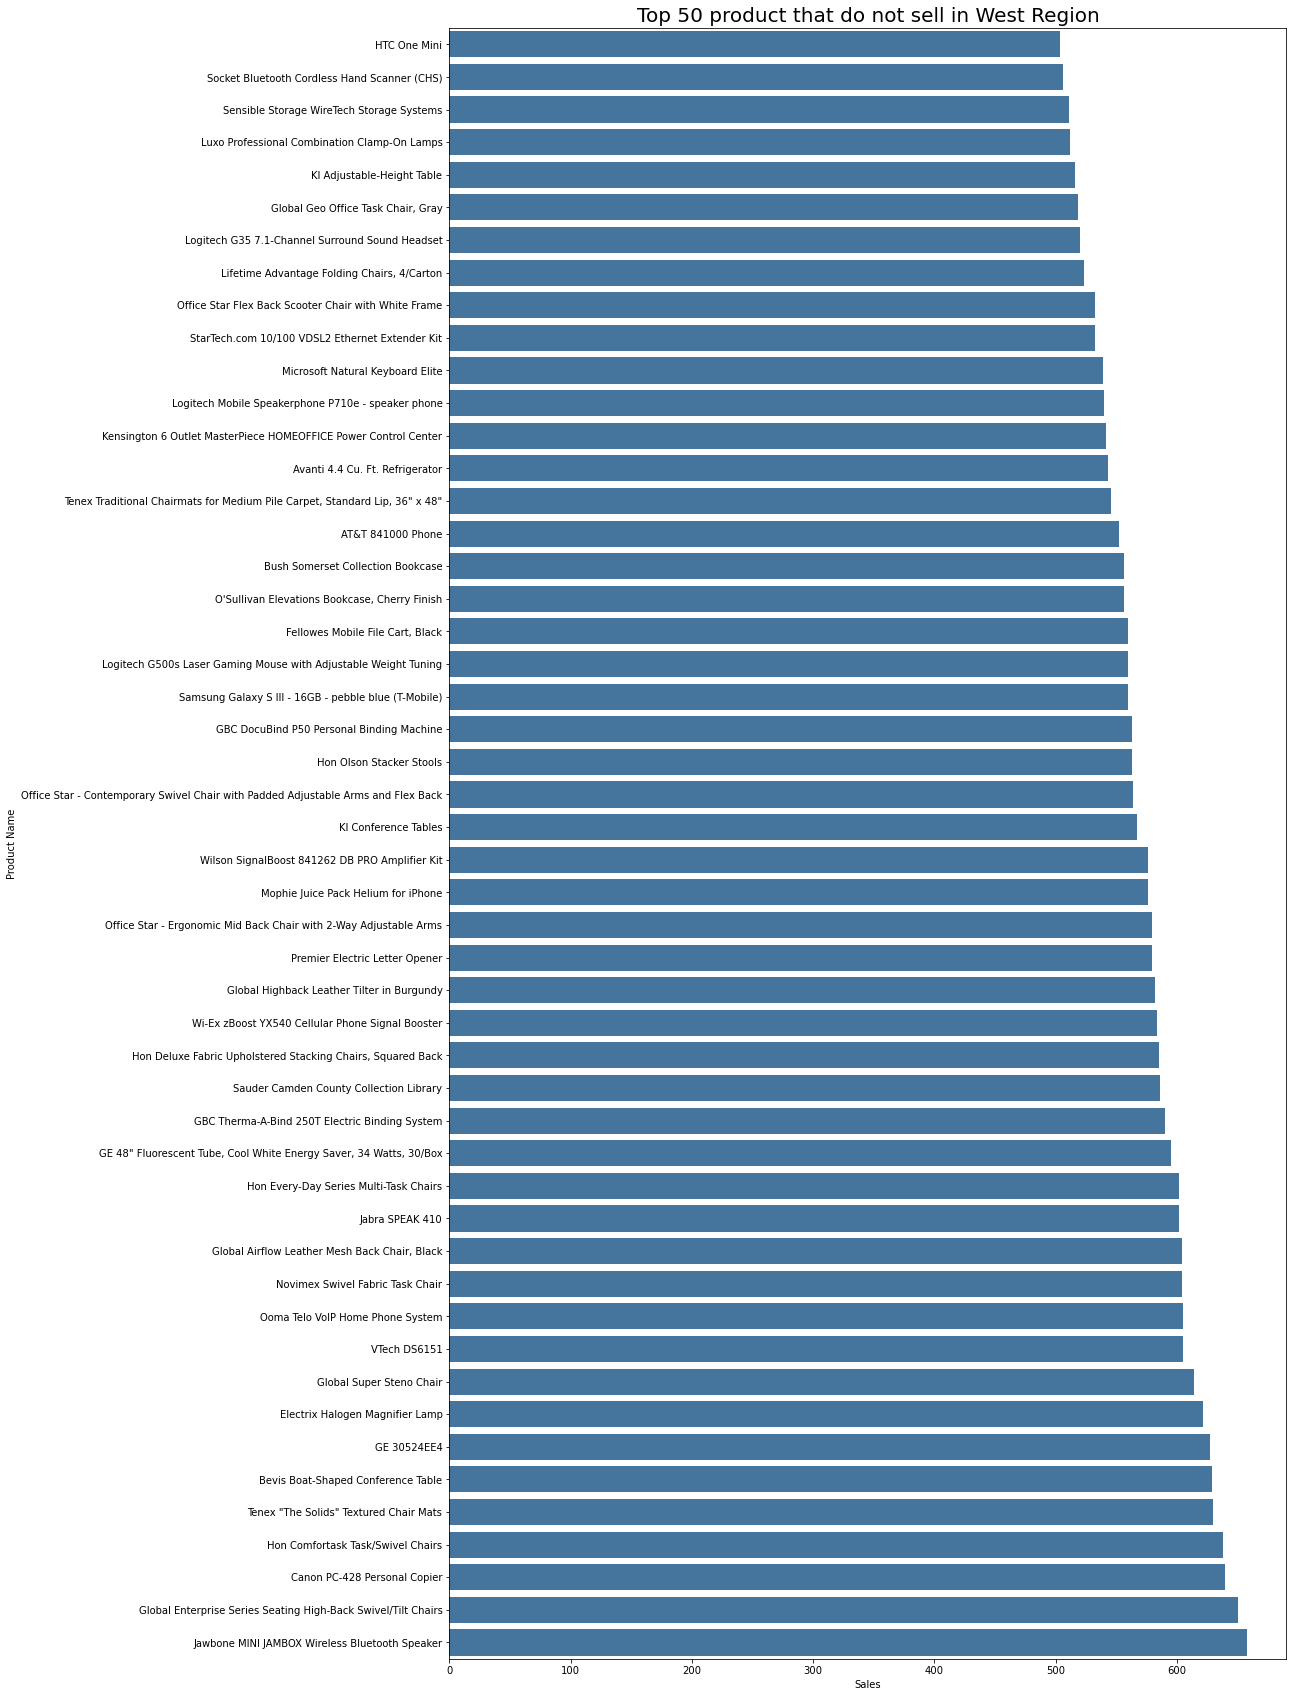

In [35]:
west_smallest = west_sales.groupby('Product Name', as_index=False).sum()
fig, ax = plt.subplots(figsize=(15, 30))
ax = sns.barplot(x="Sales", y="Product Name", ci=False, data=west_smallest.nsmallest(50,'Sales'), color='#3776ab')
plt.title("Top 50 product that do not sell in West Region", size=20)
plt.xlabel("Sales")
plt.show()

## Are there any other patterns over time in each region? 
## Analyzing Sales Trend per Region

In [36]:
product_sales['month'] = product_sales['Order Date'].dt.month_name()
product_sales['year'] = product_sales['Order Date'].dt.year

In [37]:
central_sales = product_sales[product_sales['Region']=='Central']
east_sales = product_sales[product_sales['Region']=='East']
south_sales = product_sales[product_sales['Region']=='South']
west_sales = product_sales[product_sales['Region']=='West']

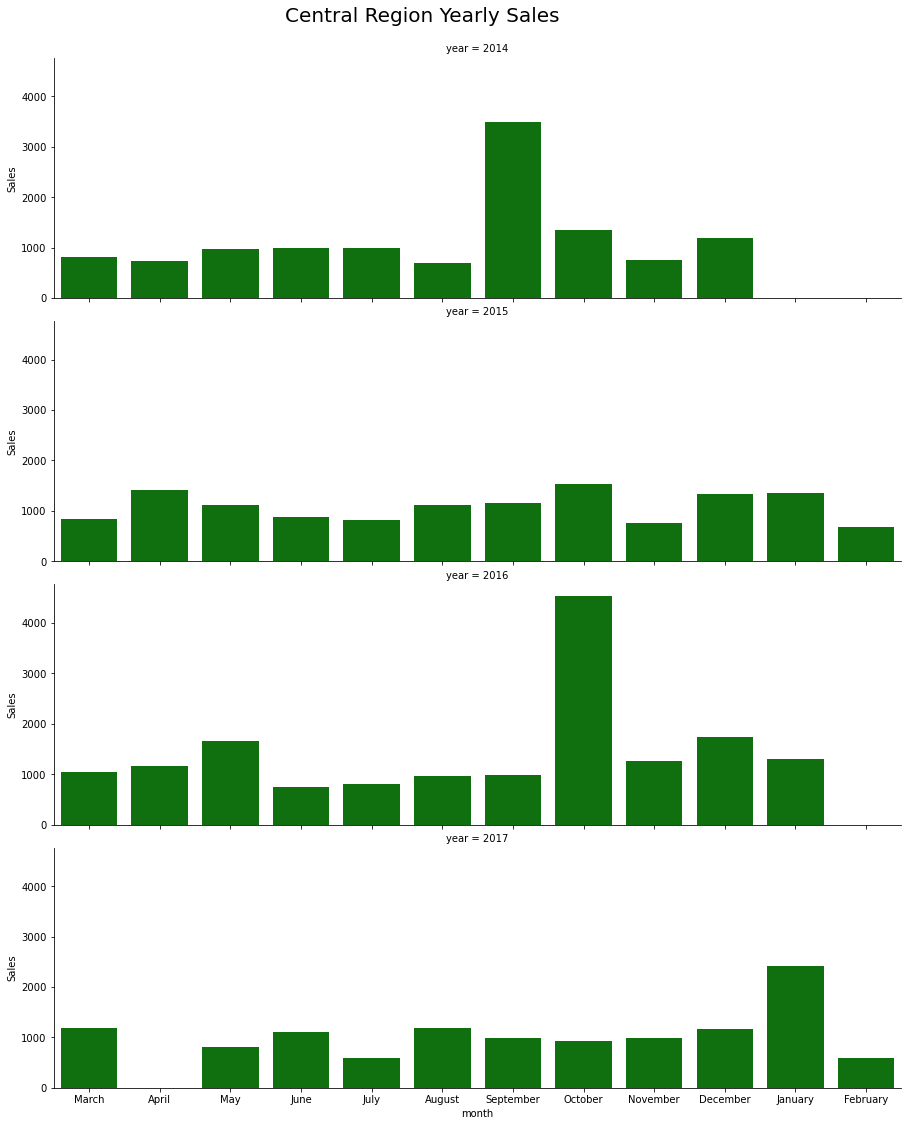

In [38]:
g = sns.catplot(x="month", y="Sales", 
            data=central_sales,
            kind="bar", 
            row="year", ci=False, color='green')
g.fig.set_figheight(15)
g.fig.set_figwidth(15)
g.fig.suptitle("Central Region Yearly Sales", y=1.03, size=20)
plt.show()

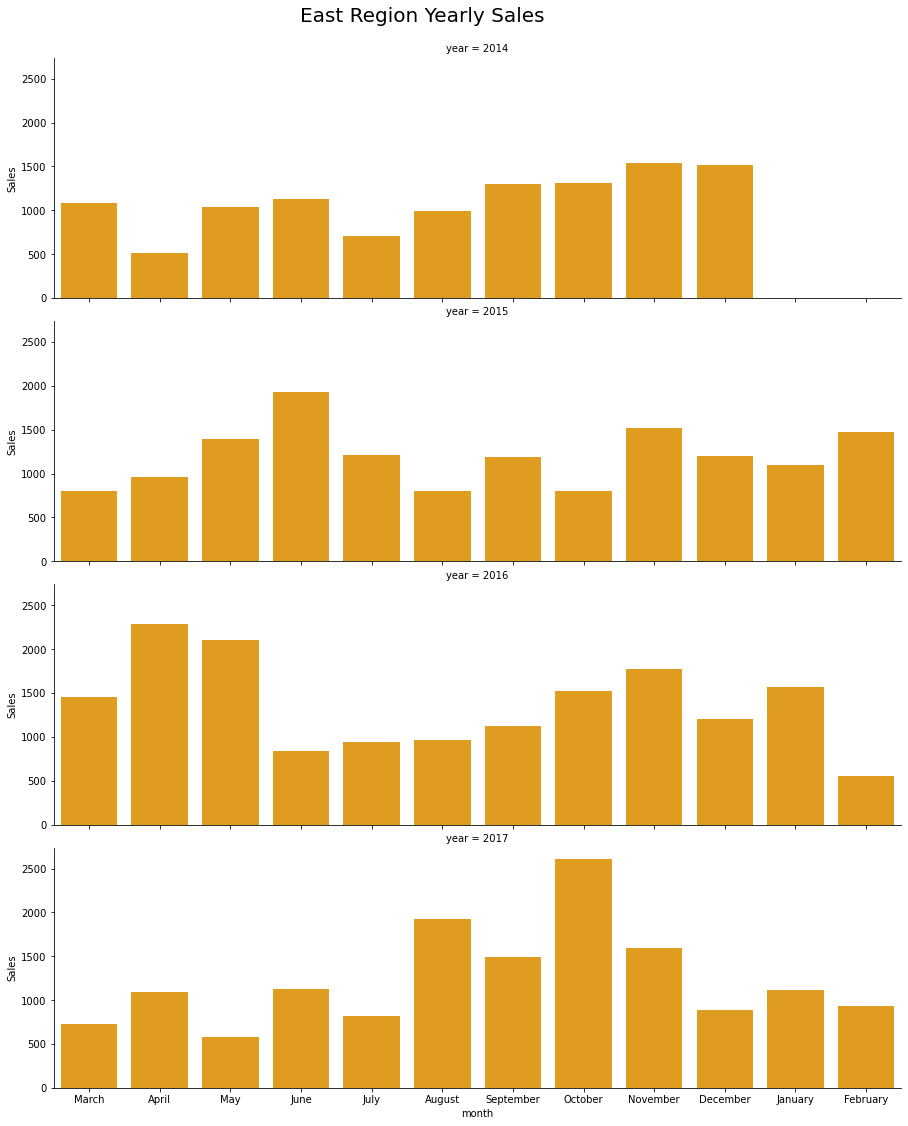

In [39]:
g = sns.catplot(x="month", y="Sales", 
            data=east_sales,
            kind="bar", 
            row="year", ci=False, color='Orange')
g.fig.set_figheight(15)
g.fig.set_figwidth(15)
g.fig.suptitle("East Region Yearly Sales", y=1.03, size=20)
plt.show()

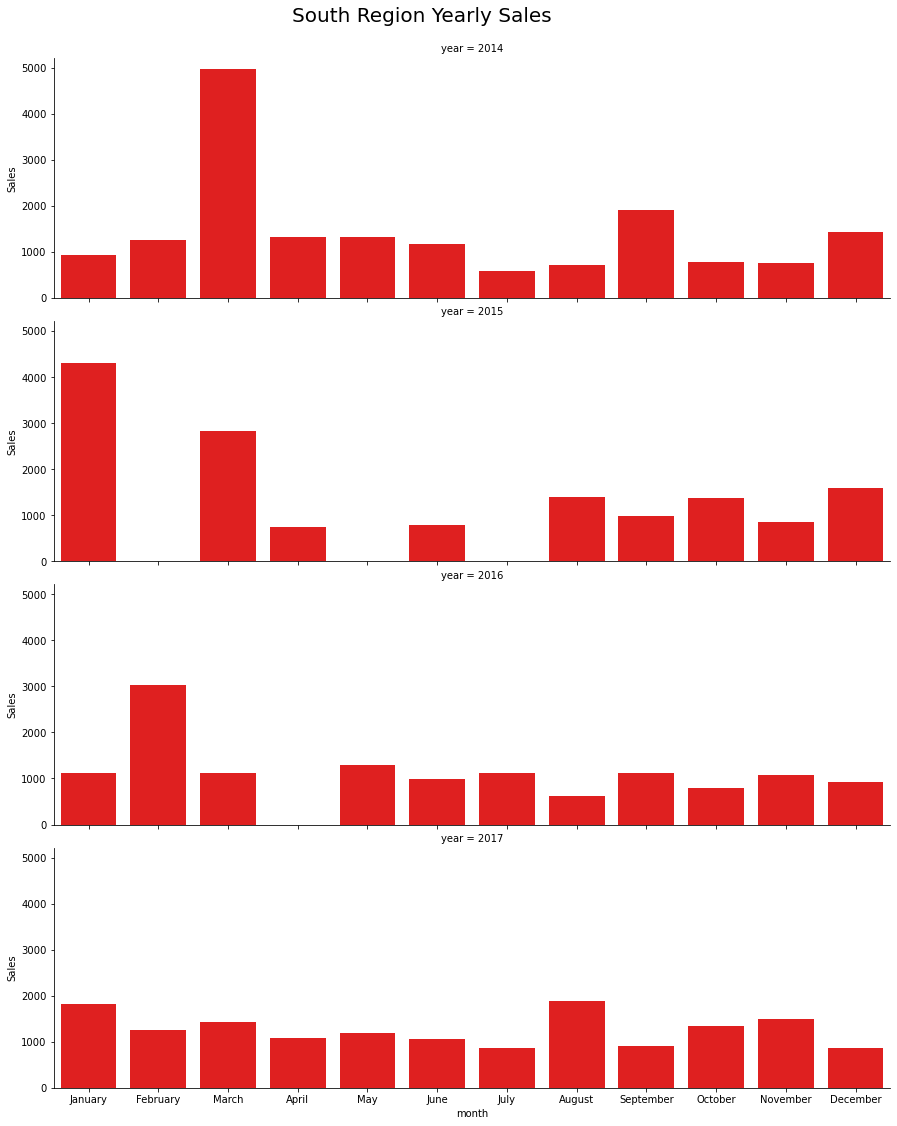

In [40]:
g = sns.catplot(x="month", y="Sales", 
            data=south_sales,
            kind="bar", 
            row="year", ci=False, color='Red')
g.fig.set_figheight(15)
g.fig.set_figwidth(15)
g.fig.suptitle("South Region Yearly Sales", y=1.03, size=20)
plt.show()

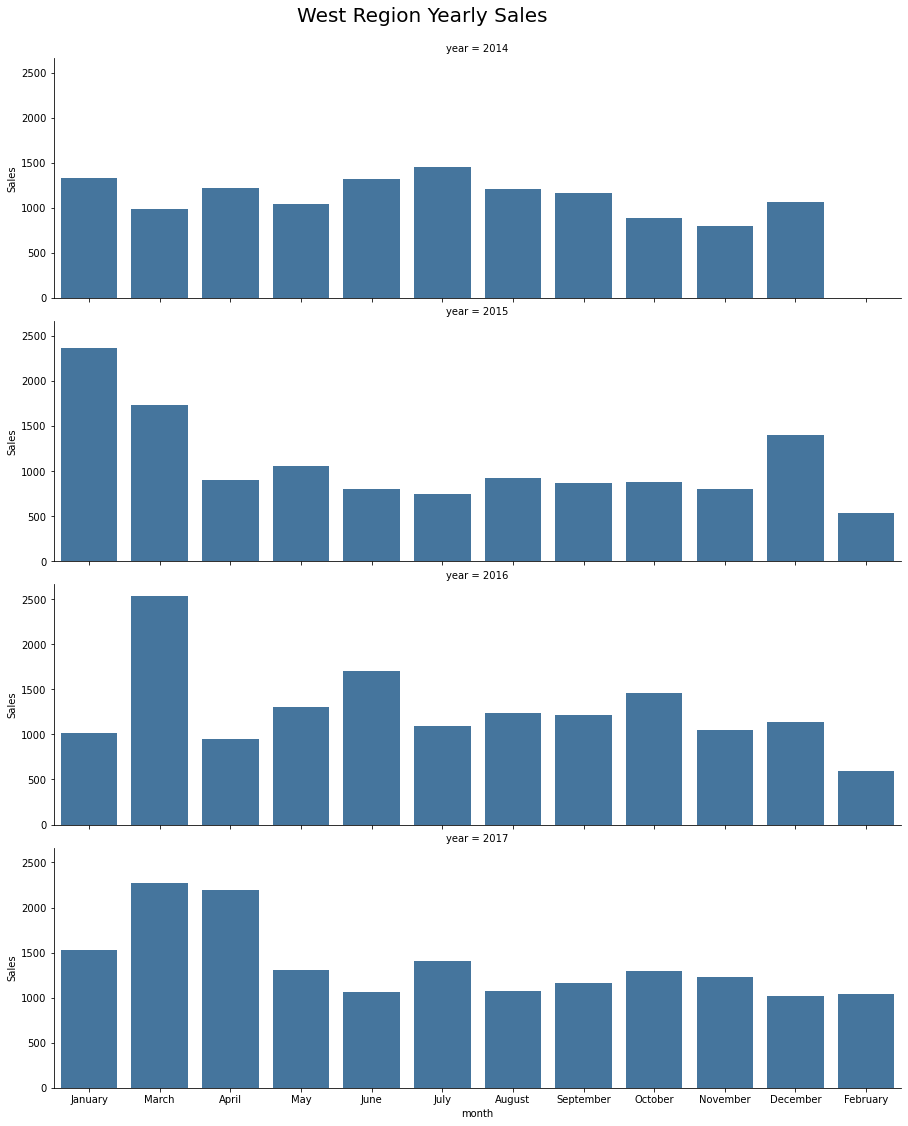

In [41]:
g = sns.catplot(x="month", y="Sales", 
            data=west_sales,
            kind="bar", 
            row="year", ci=False, color='#3776ab')
g.fig.set_figheight(15)
g.fig.set_figwidth(15)
g.fig.suptitle("West Region Yearly Sales", y=1.03, size=20)
plt.show()

In [42]:
product_sales['month_n'] = product_sales['Order Date'].dt.month

In [43]:
region_crosstab = pd.crosstab(product_sales['Region'], product_sales['month_n'], values=product_sales['Sales'],aggfunc='mean')
region_crosstab

month_n,1,2,3,4,5,6,7,8,9,10,11,12
Region,,,,,,,,,,,,
Central,1961.892967,657.096667,1026.920607,1159.647833,1094.595229,981.329222,808.574947,1036.999688,1597.912159,1995.492550,887.515615,1405.286377
East,1187.460833,1112.280143,1088.673000,1422.049111,1494.048333,1170.410130,955.826500,1335.763048,1276.766397,1768.718692,1579.245333,1206.119077
South,1356.701692,2432.754333,3203.751286,1079.409088,1257.438125,957.595733,985.426667,1117.573531,1116.468680,1152.588964,1169.406306,1011.796542
West,1634.358222,827.511556,1884.691586,1215.602909,1174.283370,1308.253980,1238.329568,1085.103865,1123.843333,1183.561185,976.091509,1144.168306


Text(0.5, 1.0, 'Heatmap of Average Monthly Sales per Region')

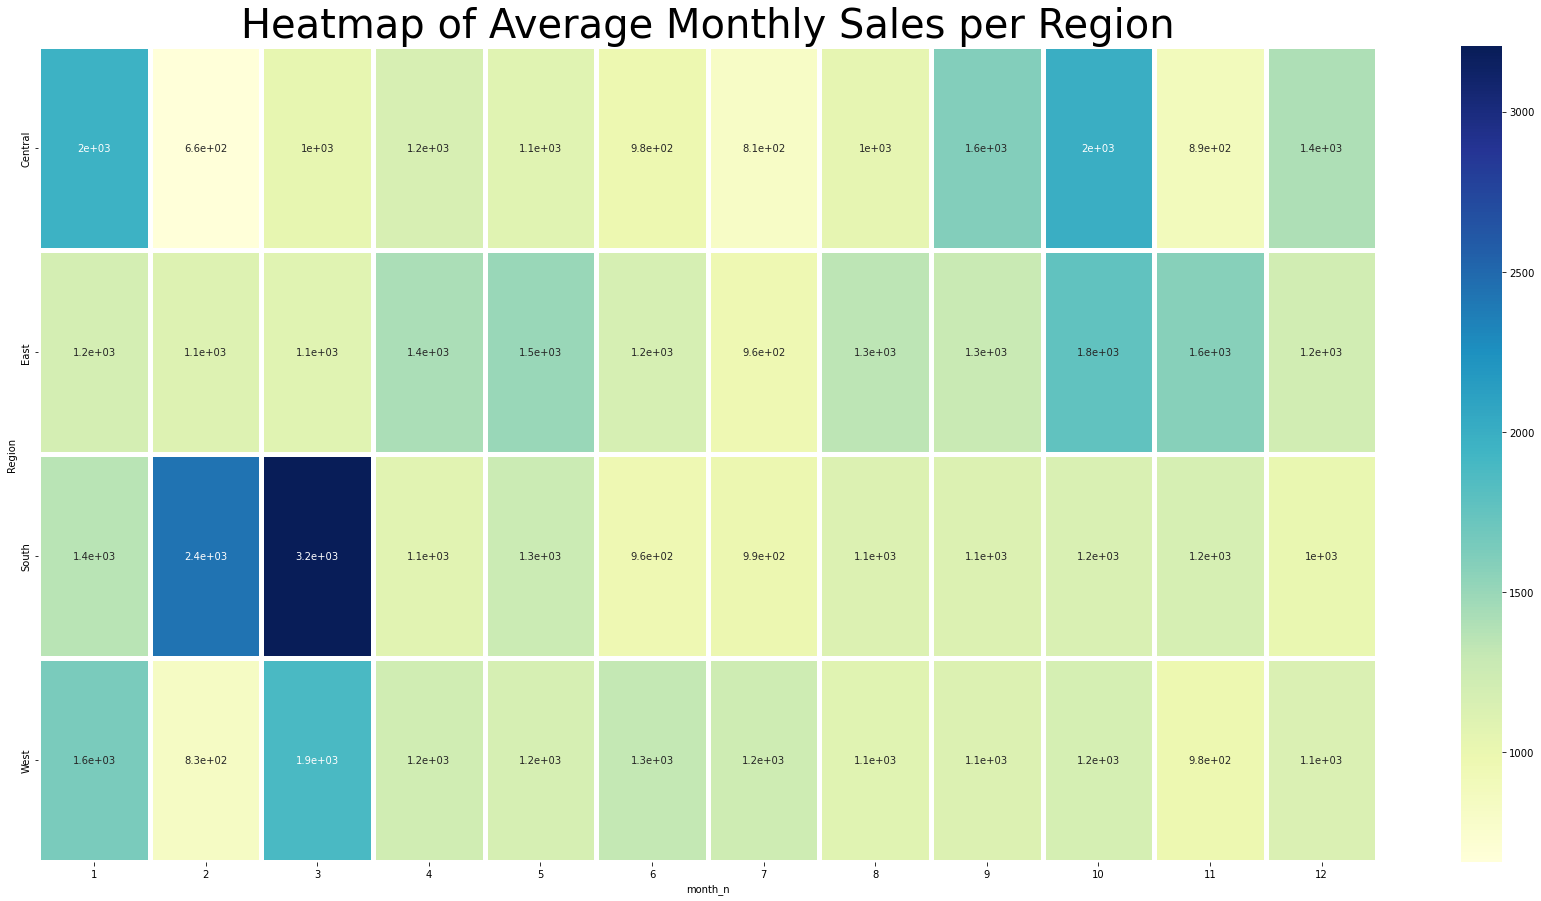

In [44]:
plt.subplots(figsize=(30, 15))
sns.heatmap(region_crosstab, annot=True, cmap="YlGnBu", linewidths=5)
plt.title("Heatmap of Average Monthly Sales per Region", size = 40)

In [45]:
product_sales['Day_of_Week'] = product_sales['Order Date'].dt.day_name()

In [46]:
product_sales["Day_of_Week"] = product_sales["Day_of_Week"].astype('category').cat.reorder_categories(new_categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ordered=True)

In [47]:
date_crosstab = pd.crosstab(product_sales['month_n'], product_sales['Day_of_Week'], values=product_sales['Sales'],aggfunc='mean')
date_crosstab

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month_n,,,,,,,
1,1294.648933,2413.096000,4297.644000,1228.921800,2209.476500,1382.970229,1634.491667
2,963.968000,5003.085000,866.400000,590.034000,943.652857,1377.035333,885.516375
3,1279.594714,2522.350235,647.840000,2758.669000,1286.721000,811.883909,1176.393027
4,1079.008083,1399.589200,1056.893333,928.942000,1014.739875,2012.216937,711.580364
5,1860.282533,760.941000,1247.462000,871.602682,1575.926727,1052.496425,1003.676187
6,963.015353,1453.983125,NaN,1128.223667,1231.510154,1200.532667,994.343731
7,1186.738105,712.864000,1161.619500,1084.689500,1525.854750,796.199000,660.288400
8,1179.317789,915.100000,1509.603200,1302.932200,1124.144225,1167.314286,1061.963412
9,1295.701743,1455.810489,1720.561000,1569.255347,1289.021759,910.398818,1169.280714


Text(0.5, 1.0, 'Heatmap of Average Monthly Sales per Day of Week')

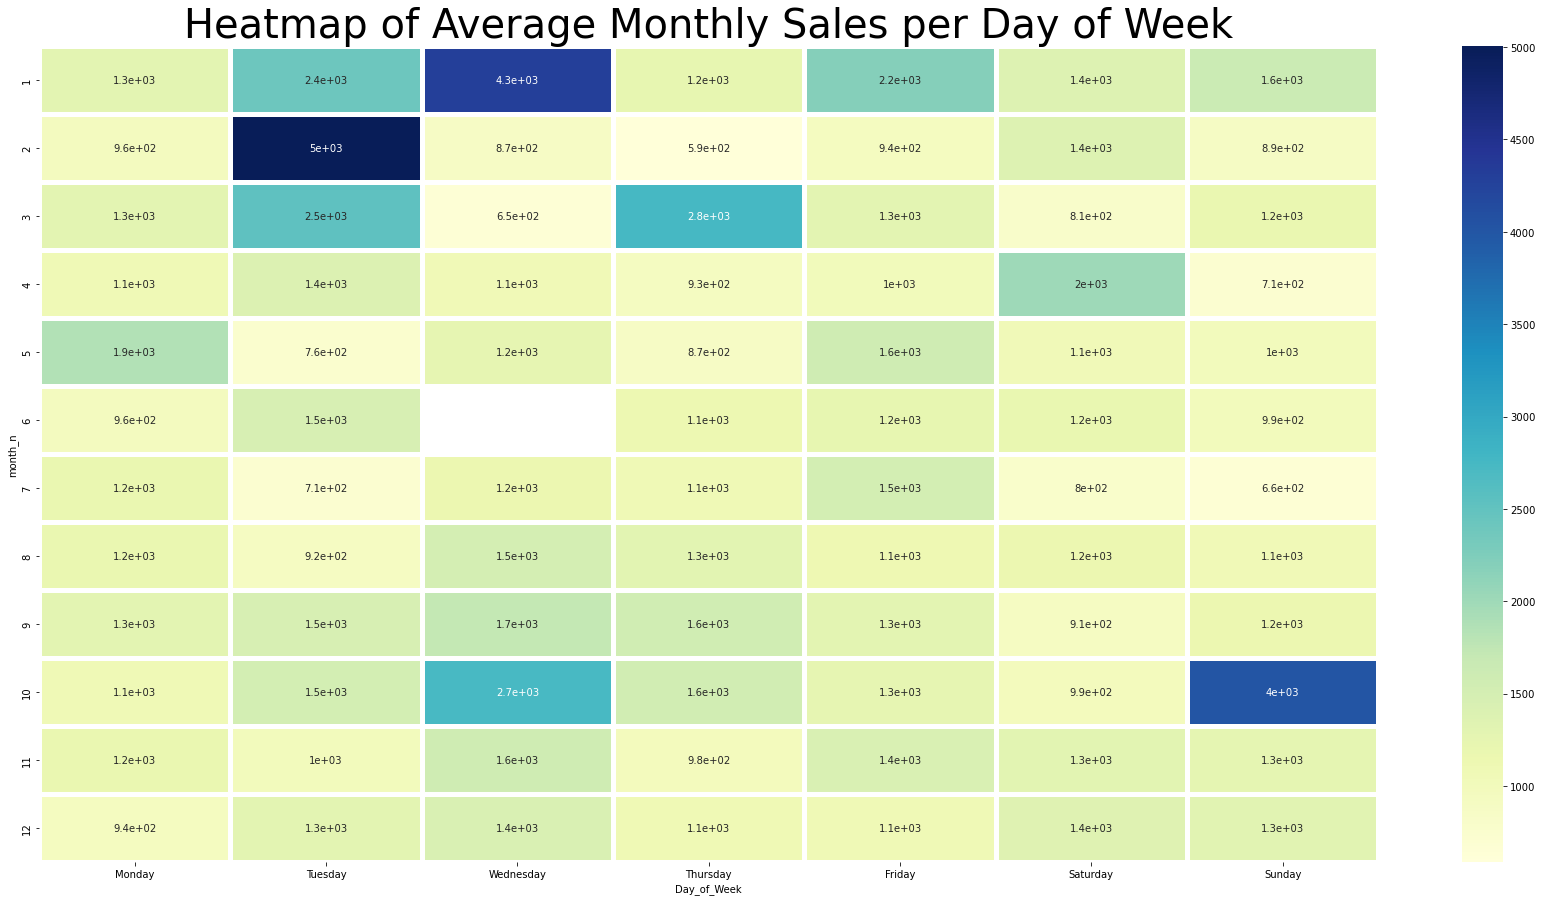

In [48]:
plt.subplots(figsize=(30, 15))
sns.heatmap(date_crosstab, annot=True, cmap="YlGnBu", linewidths=5)
plt.title("Heatmap of Average Monthly Sales per Day of Week", size = 40)

In [49]:
new_office_supplies.to_csv('new_office_supplies.csv')